In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample true labels and predictions (Modify as per your model output)
y_true = ["This is a test", "Hugging Face is great", "Fine-tuning is powerful"]
y_pred = ["This is a test", "Hugging Face is awesome", "Fine-tuning is useful"]

# Convert text to numerical labels if needed
# Example for classification tasks: y_true = [0,1,1], y_pred = [0,1,0]

# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# BLEU Score
bleu = sentence_bleu([ref.split() for ref in y_true], y_pred[0].split())

# ROUGE Score
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = [scorer.score(ref, pred) for ref, pred in zip(y_true, y_pred)]

# Confusion Matrix (Only for classification tasks)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"BLEU Score: {bleu:.4f}")
print(f"ROUGE Score: {rouge_scores}")


In [ ]:
extractive_score = news_summarizer.evaluate_extractive(test_df, rouge_score)
extractive_score

In [76]:
abstractive_score = news_summarizer.evaluate_abstractive(test_df, rouge_score, summarizer)
abstractive_score


Your max_length is set to 120, but your input_length is only 115. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


KeyboardInterrupt: 

In [74]:
article_4_abs_summary = summarizer("summarize: "+ article_4, max_length = 120, min_length = 80, do_sample = False)[0]["summary_text"]
article_4_abs_summary

'The high temperature of 95 degrees is the sixth consecutive day in a row . The region also shattered the record of 94 degrees for this day that was set in 2015 . At least seven people are suspected to have died from hyperthermia since the hot spell began a week ago in the Portland area . "We have gotten there," she said about reaching the daily record milestone .'

In [73]:
article_4_ex_summary = news_summarizer.extractive_summary(article_4)
article_4_ex_summary

'SEATTLE — Seattle on Sunday set two new hot weather records as the high temperature of 95 degrees marked the sixth consecutive day in a row with high temperatures at 90 degrees or above. As of 2:30 p.m. Sunday, the high temperature at Seattle-Tacoma International Airport was 91 degrees before the mercury ultimately topped out at 95 degrees, besting by one degree the daily record set seven years ago. Sunday marked the eighth time this summer that Seattle has seen a high temperature of 90 degrees or above and the fifth time since 2015 the region has logged a season with eight days or more above that threshold, according to local meteorologists.'

In [72]:
article_4 = """SEATTLE — Seattle on Sunday set two new hot weather records as the high temperature of 95 degrees marked the sixth consecutive day in a row with high temperatures at 90 degrees or above.

The region also shattered the record of 94 degrees for this day that was set in 2015, according to the National Weather Service.

But the week-long heatwave is expected to come to an end Monday when the weather is expected to be noticeably cooler.
As of 2:30 p.m. Sunday, the high temperature at Seattle-Tacoma International Airport was 91 degrees before the mercury ultimately topped out at 95 degrees, besting by one degree the daily record set seven years ago.

"We have gotten there," she said about reaching the daily record milestone.
It was even hotter in interior parts of Washington with several areas logging triple-digit temperatures for the day.

Sunday marked the eighth time this summer that Seattle has seen a high temperature of 90 degrees or above and the fifth time since 2015 the region has logged a season with eight days or more above that threshold, according to local meteorologists.

The high temperature Saturday topped out at 94 degrees at SeaTac Airport, the fifth days of temperatures in the 90 range.

But a big cooling trend is on the way.
Stevenson said the high temperature Monday and Tuesday is expected to climb only to the low 80s with a bigger cool down expected Wednesday, which could also see drizzle.

The heat has taken a toll on the Pacific Northwest.

Authorities in the Portland announced that they would keep cooling shelters open through Sunday night.

At least seven people are suspected to have died from hyperthermia since the hot spell began a week ago in the Portland area
"""
article_4

'SEATTLE — Seattle on Sunday set two new hot weather records as the high temperature of 95 degrees marked the sixth consecutive day in a row with high temperatures at 90 degrees or above.\n\nThe region also shattered the record of 94 degrees for this day that was set in 2015, according to the National Weather Service.\n\nBut the week-long heatwave is expected to come to an end Monday when the weather is expected to be noticeably cooler.\nAs of 2:30 p.m. Sunday, the high temperature at Seattle-Tacoma International Airport was 91 degrees before the mercury ultimately topped out at 95 degrees, besting by one degree the daily record set seven years ago.\n\n"We have gotten there," she said about reaching the daily record milestone.\nIt was even hotter in interior parts of Washington with several areas logging triple-digit temperatures for the day.\n\nSunday marked the eighth time this summer that Seattle has seen a high temperature of 90 degrees or above and the fifth time since 2015 the re

In [71]:
summarizer("summarize: "+ article_3, max_length = 120, min_length = 80, do_sample = False)

[{'summary_text': "Pottinger is slated to appear alongside former Trump White House aide Sarah Matthews . Matthews said she was honored to serve in Trump's administration . He stepped down in response to Trump'd reaction to supporters breaching the US Capitol . Pottingers said people there was very little for him to consider, he said at the time of his resignation ."}]

In [70]:
article_3 = """(CNN)Matthew Pottinger, who served on former President Donald Trump's
National Security Council before resigning in the immediate aftermath of January 6, 2021, will testify publicly at Thursday's prime-time hearing held by the House select committee investigating the US Capitol attack, according to multiple sources familiar with the plans.

Pottinger is slated to appear alongside former Trump White House aide Sarah Matthews.
CNN previously reported that Matthews, who served as deputy press secretary in the Trump White House until resigning
shortly after January 6, 2021, was expected to testify publicly. When she resigned, Matthews said she was honored to serve in
Trump's administration but "was deeply disturbed by what I saw." She said at the time, "Our nation needs a peaceful transfer of power."
Pottinger, Trump's deputy national security adviser, stepped down in response to Trump's reaction to his supporters breaching
the US Capitol, a person close to Pottinger confirmed to CNN at the time of his resignation. He told people there was very little for him to consider,
the person said at the time.

"""
article_3

'(CNN)Matthew Pottinger, who served on former President Donald Trump\'s \nNational Security Council before resigning in the immediate aftermath of January 6, 2021, will testify publicly at Thursday\'s prime-time hearing held by the House select committee investigating the US Capitol attack, according to multiple sources familiar with the plans.\n\nPottinger is slated to appear alongside former Trump White House aide Sarah Matthews.\nCNN previously reported that Matthews, who served as deputy press secretary in the Trump White House until resigning \nshortly after January 6, 2021, was expected to testify publicly. When she resigned, Matthews said she was honored to serve in \nTrump\'s administration but "was deeply disturbed by what I saw." She said at the time, "Our nation needs a peaceful transfer of power."\nPottinger, Trump\'s deputy national security adviser, stepped down in response to Trump\'s reaction to his supporters breaching \nthe US Capitol, a person close to Pottinger conf

In [69]:
summarizer("summarize: "+ article_2, max_length = 120, min_length = 80, do_sample = False)

[{'summary_text': 'Eiffel Tower is 324 metres tall, about the same height as an 81-storey building . It was the first structure to reach a height of 300 metres . Excluding transmitters, it is now taller than the Chrysler Building by 5.2 metres (17 ft) It is the second tallest free-standing structure in France after the Millau Viaduct .'}]

In [68]:
article_2 = """The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris.
Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world,
a title it held for 41 years until the Chrysler Building in New York City was finished in 1930.
It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by
5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct."""
article_2

'The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. \nIts base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, \na title it held for 41 years until the Chrysler Building in New York City was finished in 1930. \nIt was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by \n5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.'

In [67]:
news_summarizer.get_rouge_score(abs_summary, highlight)

{'rouge1': Score(precision=0.13953488372093023, recall=0.10344827586206896, fmeasure=0.1188118811881188),
 'rougeL': Score(precision=0.09302325581395349, recall=0.06896551724137931, fmeasure=0.07920792079207921)}

In [66]:
summary = summarizer(article, max_length = 120, min_length = 80, do_sample = False)
abs_summary = summary[0]['summary_text']
abs_summary

"President's half-hearted effort to reduce physical contact was a jolting switch . Biden has been shaking plenty of hands in the days leading up to his trip . White House press secretary Karine Jean-Pierre denies that was the reason for the effort . CIA has alleged that Jamal Khashoggi was killed in an operation approved by bin Salman ."

In [65]:
article

'The President doled out fist bumps and pats on the shoulder to the delegation stationed along the red carpet at the foot of Air Force One, which the White House said was part of an effort to reduce physical contact amid the rapid spread of a new coronavirus variant.\nBut only minutes later, Biden broke with the new effort -- exchanging a hearty handshake with the former Israeli Prime Minister Benjamin Netanyahu, the current opposition leader. Biden later also clasped hands with a pair of Holocaust survivors at Yad Vashem.\nThe President\'s half-hearted effort to reduce physical contact on his trip to the Middle East was a jolting switch for Biden, who has been shaking plenty of hands in the days leading up to his trip. And it raised questions about whether the White House was trying to avoid the optics of Biden shaking hands with Saudi Arabia\'s Crown Prince Mohammad bin Salman, whom Biden will meet for the first time on Friday.\nBiden has been facing questions about that meeting afte

In [64]:
generate_summary(50)

Token indices sequence length is longer than the specified maximum sequence length for this model (1341 > 900). Running this sequence through the model will result in indexing errors



'>>> Article: (CNN)According to an outside review by Columbia Journalism School professors, "(a)n institutional failure at Rolling Stone resulted in a deeply flawed article about a purported gang rape at the University of Virginia." The Columbia team concluded that "The failure encompassed reporting, editing, editorial supervision and fact-checking." Hardly a ringing endorsement of the editorial process at the publication. The magazine's managing editor, Will Dana, wrote, "We would like to apologize to our readers and to all of those who were damaged by our story and the ensuing fallout, including members of the Phi Kappa Psi fraternity and UVA administrators and students." Brian Stelter: Fraternity to 'pursue all available legal action' The next question is: . Can UVA, Phi Kappa Psi or any of the other fraternities on campus sue for defamation? The Virginia Supreme Court said in Jordan v. Kollman that "the elements of libel are (1) publication of (2) an actionable statement with (3) 

In [63]:
generate_summary(100)


'>>> Article: (CNN)Anthony Ray Hinton is thankful to be free after nearly 30 years on Alabama's death row for murders he says he didn't commit. And incredulous that it took so long. Hinton, 58, looked up, took in the sunshine and thanked God and his lawyers Friday morning outside the county jail in Birmingham, minutes after taking his first steps as a free man since 1985. He spoke of unjustly losing three decades of his life, under fear of execution, for something he didn't do. "All they had to do was to test the gun, but when you think you're high and mighty and you're above the law, you don't have to answer to nobody," Hinton told reporters. "But I've got news for you -- everybody that played a part in sending me to death row, you will answer to God." Jefferson County Circuit Court Judge Laura Petro had ordered Hinton released after granting the state's motion to dismiss charges against him. Hinton was convicted of murder in the 1985 deaths of two Birmingham-area, fast-food restaura

In [62]:
def generate_summary(idx):
    '''Generates abstractive summary for an article from test set'''
    article = dataset_sample["test"][idx]["article"]
    actual_summary = dataset_sample["test"][idx]["highlights"]
    generated_summary = summarizer("summarize: "+dataset_sample["test"][idx]["article"], max_length = 100, min_length = 50, do_sample = False)[0]["summary_text"]
    print(f"\n'>>> Article: {article}'")
    print(f"\n'>>> Original Summary: {actual_summary}'")
    print(f"\n'>>> Generated Summary: {generated_summary}'")

In [61]:
from transformers import pipeline
hub_model_id = "rahuljainx911/t5-small-finetuned-cnn-news"
summarizer = pipeline("summarization", model=hub_model_id)

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Device set to use cuda:0


In [59]:
trainer.push_to_hub(commit_message="Training complete", tags="summarization")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1741980763.a4f545b64774.47908.1:   0%|          | 0.00/562 [00:00<?, ?B/s]

events.out.tfevents.1741978372.a4f545b64774.47908.0:   0%|          | 0.00/9.85k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/rahuljainx911/t5-small-finetuned-cnn-news/commit/660848fa5f3e64f565e687d1b9158d365d735b04', commit_message='Training complete', commit_description='', oid='660848fa5f3e64f565e687d1b9158d365d735b04', pr_url=None, repo_url=RepoUrl('https://huggingface.co/rahuljainx911/t5-small-finetuned-cnn-news', endpoint='https://huggingface.co', repo_type='model', repo_id='rahuljainx911/t5-small-finetuned-cnn-news'), pr_revision=None, pr_num=None)

In [58]:
trainer.evaluate()

{'eval_loss': 2.2246532440185547,
 'eval_rouge1': 24.2919,
 'eval_rouge2': 9.258,
 'eval_rougeL': 19.7921,
 'eval_rougeLsum': 22.4439,
 'eval_runtime': 28.5053,
 'eval_samples_per_second': 11.752,
 'eval_steps_per_second': 1.473,
 'epoch': 5.0}

In [57]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,2.082000,2.135812,24.193600,9.302500,19.933400,22.466800
2,1.850900,2.176761,24.604100,9.902000,20.255400,22.600100
3,1.688100,2.188333,24.849000,9.474200,20.417600,23.077900
4,1.569000,2.212675,24.970100,10.017900,20.780900,23.242600
5,1.480100,2.224653,24.291900,9.258000,19.792100,22.443900


TrainOutput(global_step=3590, training_loss=1.7336155208704531, metrics={'train_runtime': 2357.3303, 'train_samples_per_second': 12.181, 'train_steps_per_second': 1.523, 'total_flos': 6824624084877312.0, 'train_loss': 1.7336155208704531, 'epoch': 5.0})

In [56]:
import torch
torch.cuda.empty_cache()

In [55]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-55-a9ab4261e5f4>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [54]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Get existing columns
existing_columns = set(tokenized_datasets["train"].column_names)
columns_to_remove = {"article", "highlights", "id"} & existing_columns  # Only remove present columns

# Remove columns safely
tokenized_datasets = tokenized_datasets.remove_columns(list(columns_to_remove))

# Get features for data collator
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)



{'input_ids': tensor([[  301, 24796,  4170,  ...,     0,     0,     0],
        [11953,    31,     7,  ...,   131, 19372,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[ 8929, 16023,  2213,  4173,  6324, 12591,    15,  2347,  3996,  1755,
           329, 13462,    38,     3,    88,  5050,   507,  2089,     3,     5,
          5209,  7556,   845,     3,    88,    65,   150,  1390,    12,  9030,
            17,   449,   112,  1723,   550,     3,     5,  6324, 12591,    15,
            31,     7,  8783,    45,   166,   874, 16023,  4852,    43,   118,
          1213,    16,  2019,  3069,     3,     5,     1,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100],
        [17054,   120,     3,  1092,    16, 11171,    16,  8327,    33,   629,
            26,    30,     8,    96,  1161,  7483,  1501,   121, 12330, 

In [53]:
def compute_metrics(eval_pred):
    '''Computes metrics that can be used while training'''
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # median scores, we get the fmeasure as percentage
    result = {key: value * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}

In [52]:
import evaluate

rouge_score = evaluate.load("rouge")

In [51]:
from huggingface_hub import notebook_login

notebook_login()

In [50]:
batch_size = 8
num_train_epochs = 5
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-cnn-news",
    evaluation_strategy="epoch",
    learning_rate=5.6e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    logging_steps=logging_steps,
    push_to_hub=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [49]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [48]:
tokenized_datasets = dataset_sample.map(preprocess_function, batched=True)

In [47]:
dataset_sample = dataset
dataset_sample['train'] = dataset['train'].shard(num_shards=50, index=0)
dataset_sample['validation'] = dataset['validation'].shard(num_shards=40, index=0)
dataset_sample['test'] = dataset['test'].shard(num_shards=40, index=0)
dataset_sample

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 5743
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 335
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 288
    })
})

In [46]:
# Shuffle to get a random sample
dataset.shuffle()

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [45]:
def preprocess_function(examples):
  '''Preprocesses the data as required by huggingface transformer'''
  model_inputs = tokenizer(
      examples["article"], max_length=max_input_length, truncation=True
  )
  with tokenizer.as_target_tokenizer():
      labels = tokenizer(
          examples["highlights"], max_length=max_target_length, truncation=True
      )

  model_inputs["labels"] = labels["input_ids"]
  return model_inputs

In [44]:
# Import necessary libraries
from datasets import load_dataset
from transformers import AutoTokenizer
import wandb  # Import Weights & Biases

# Initialize W&B
wandb.init(project="t5-text-summarization", name="finetuning-t5-small")

# Load dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Model configuration
model_checkpoint = "t5-small"
max_input_length = 900
max_target_length = 120

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=False, model_max_length=max_input_length)

# Log model and tokenizer info
wandb.config.update({
    "model_checkpoint": model_checkpoint,
    "max_input_length": max_input_length,
    "max_target_length": max_target_length
})

print("Setup complete. Ready for fine-tuning!")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: jain-rahul28jain (jain-rahul28jain-vit-vellore) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Setup complete. Ready for fine-tuning!


In [43]:
summarizer(article, max_length = 120, min_length = 50, do_sample = False)

[{'summary_text': ' The President doled out fist bumps and pats on the shoulder to the delegation stationed along the red carpet at the foot of Air Force One . The White House said it was part of an effort to reduce physical contact amid the rapid spread of a new coronavirus variant . But minutes later, Biden broke with the new effort -- exchanging a hearty handshake with the former Israeli Prime Minister Benjamin Netanyahu, the current opposition leader .'}]

In [42]:
article = '''The President doled out fist bumps and pats on the shoulder to the delegation stationed along the red carpet at the foot of Air Force One, which the White House said was part of an effort to reduce physical contact amid the rapid spread of a new coronavirus variant.
But only minutes later, Biden broke with the new effort -- exchanging a hearty handshake with the former Israeli Prime Minister Benjamin Netanyahu, the current opposition leader. Biden later also clasped hands with a pair of Holocaust survivors at Yad Vashem.
The President's half-hearted effort to reduce physical contact on his trip to the Middle East was a jolting switch for Biden, who has been shaking plenty of hands in the days leading up to his trip. And it raised questions about whether the White House was trying to avoid the optics of Biden shaking hands with Saudi Arabia's Crown Prince Mohammad bin Salman, whom Biden will meet for the first time on Friday.
Biden has been facing questions about that meeting after saying as a candidate he would make Saudi Arabia a "pariah" for the killing of journalist Jamal Khashoggi. The CIA has alleged that Khashoggi was killed in an operation approved by bin Salman.
Pressed by reporters aboard Air Force One, White House press secretary Karine Jean-Pierre denied that was the reason for the attempt at reduced physical contact.
"We are saying that we're going to try to minimize contact as much as possible. But also, there are precautions that we are taking because this is up to his doctor. BA.4, BA.5 is indeed, as we're seeing, increasing. And we want to make sure that we're taking those precautions to keep him safe and to keep all of us safe," Jean-Pierre said, referring to emerging coronavirus variants.'''

In [41]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [40]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
from transformers import pipeline
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
def evaluate_extractive(self, dataset, metric):
    summaries = [self.extractive_summary(text) for text in dataset["article"]]
    score =  metric.compute(predictions=summaries, references=dataset["highlights"])
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    # The 'score' dictionary now directly contains the fmeasure values.
    rouge_dict = dict((rn, round(score[rn].fmeasure * 100, 2)) for rn in rouge_names)
    return rouge_dict

In [38]:
news_summarizer.get_rouge_score(highlight, ex_summary)

{'rouge1': Score(precision=0.18627450980392157, recall=0.4418604651162791, fmeasure=0.2620689655172414),
 'rougeL': Score(precision=0.0784313725490196, recall=0.18604651162790697, fmeasure=0.1103448275862069)}

In [37]:
ex_summary

'The veterinary hospital\'s Good Samaritan Fund committee awarded some money to help pay for the dog\'s treatment, but Mellado has set up a fundraising page to help meet the remaining cost of the dog\'s care. That\'s according to Washington State University, where the dog -- a friendly white-and-black bully breed mix now named Theia -- has been receiving care at the Veterinary Teaching Hospital. She is dedicated to making sure Theia gets the medical attention she needs, Mellado adds, and wants to "make sure she gets placed in a family where this will never happen to her again!"'

In [36]:
article

'(CNN)Never mind cats having nine lives. A stray pooch in Washington State has used up at least three of her own after being hit by a car, apparently whacked on the head with a hammer in a misguided mercy killing and then buried in a field -- only to survive. That\'s according to Washington State University, where the dog -- a friendly white-and-black bully breed mix now named Theia -- has been receiving care at the Veterinary Teaching Hospital. Four days after her apparent death, the dog managed to stagger to a nearby farm, dirt-covered and emaciated, where she was found by a worker who took her to a vet for help. She was taken in by Moses Lake, Washington, resident Sara Mellado. "Considering everything that she\'s been through, she\'s incredibly gentle and loving," Mellado said, according to WSU News. "She\'s a true miracle dog and she deserves a good life." Theia is only one year old but the dog\'s brush with death did not leave her unscathed. She suffered a dislocated jaw, leg inju

In [35]:
article = test_df['article'][1]
highlight = test_df['highlights'][1]
ex_summary = news_summarizer.extractive_summary(article)

In [34]:
news_summarizer = NewsSummarization()

In [33]:
class NewsSummarization():
  def __init__(self):
    pass
  def extractive_summary(self, text, sentence_len = 8, num_sentences = 3):
    '''Generates extractive summary of num_sentences length using sentence scoring'''
    word_frequencies = {}
    # Instantiate Custom Preprocessor class
    preprocessor = Preprocess()
    # preprocess and tokenize article
    tokenized_article = preprocessor.complete_preprocess(text)
    #calculate word frequencies
    for sentence in tokenized_article:
      for word in sentence:
        if word not in word_frequencies.keys():
          word_frequencies[word] = 1
        else:
          word_frequencies[word] += 1
    #get maximum frequency for score normalisation
    maximum_frequency = max(word_frequencies.values())
    #normalize word frequency
    for word in word_frequencies.keys():
          word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
    sentence_scores = {}

    # score sentences by adding word scores
    sentence_list = nltk.sent_tokenize(text)
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) > sentence_len:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]
    # get sentences with largest sentence scores
    summary_sentences = heapq.nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    # join and get extractive summary
    summary = ' '.join(summary_sentences)
    return summary

  def get_rouge_score(self, actual_summary, generated_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = scorer.score(actual_summary, generated_summary)
    return scores

  def evaluate_extractive(self, dataset, metric):
    summaries = [self.extractive_summary(text) for text in dataset["article"]]
    score =  metric.compute(predictions=summaries, references=dataset["highlights"])
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
    return rouge_dict

  def evaluate_abstractive(self, dataset, metric, summarizer):
    summaries =  [summarizer(text, max_length = 120, min_length = 80, do_sample = False)[0]['summary_text'] for text in dataset["article"]]
    score =  metric.compute(predictions=summaries, references=dataset["highlights"])
    rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
    rouge_dict = dict((rn, round(score[rn].mid.fmeasure * 100, 2)) for rn in rouge_names)
    return rouge_dict

<Axes: ylabel='highlights_len'>

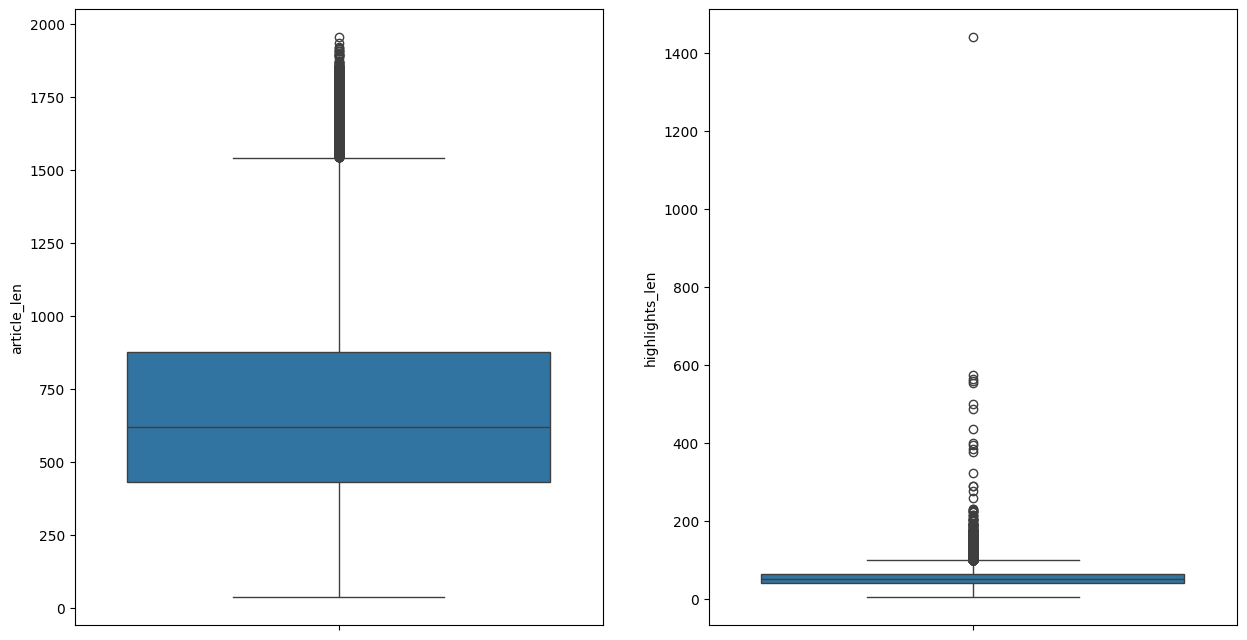

In [32]:
# Create subplots and plot a distribution plot
fig, axes = plt.subplots(1, 2, figsize = (15,8))
sns.boxplot(data = total_df, y=total_df['article_len'], ax=axes[0])
sns.boxplot(data = total_df, y = total_df['highlights_len'],ax = axes[1])

<ipython-input-31-594039718c57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_df['article_len'], ax=axes[0])
<ipython-input-31-594039718c57>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_df['highlights_len'], ax = axes[1])


<Axes: xlabel='highlights_len', ylabel='Density'>

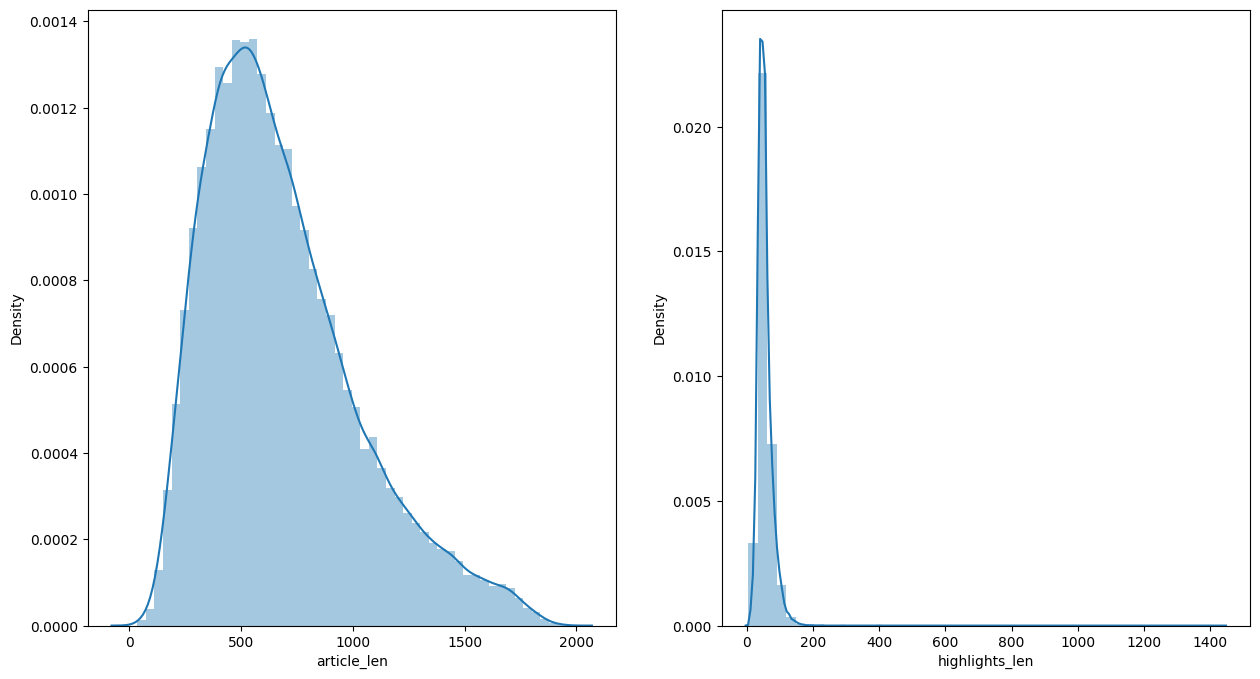

In [31]:
# Create subplots and plot a distribution plot
fig, axes = plt.subplots(1, 2, figsize = (15,8))
sns.distplot(total_df['article_len'], ax=axes[0])
sns.distplot(total_df['highlights_len'], ax = axes[1])

In [30]:
total_df[['article_len','highlights_len']].describe()

,article_len,highlights_len
count,54858.000000,54858.000000
mean,685.240931,53.868460
std,341.065891,22.721225
min,36.000000,4.000000
25%,429.250000,39.000000
50%,620.000000,50.000000
75%,874.000000,63.000000
max,1954.000000,1440.000000


In [29]:
# Concatenate all sets for EDA
total_df = pd.concat([train_df, validation_df, test_df])
total_df.head()

,article,highlights,id,clean_article,clean_highlights,article_len,highlights_len
0,"By . Tom Gardner . PUBLISHED: . 05:50 EST, 29 ...","David Stedman, 43, had been let out of prison ...",1e0276de8fafe8c9fd8c8cb02d55185da8db11fc,"[[], [tom, gardner], [publish], [05, 50, est, ...","[[david, stedman, 43, let, prison, early, poli...",492,80
1,New York (CNN) -- The New York Police Departme...,"NEW: Bloomberg says NYPD ""has a lot of capabil...",bc8d0b00ac9fcf39fdc10452d5fd9b0b7a1476fb,"[[new, york, cnn, new, york, police, departmen...","[[new, bloomberg, say, nypd, lot, capabilities...",463,60
2,This man has starred in more Hollywood blockbu...,"Colin Follenweider has appeared in Die Hard, X...",a526856afefa670a7b35cdef0f42ceeac39dfd68,"[[man, star, hollywood, blockbusters, favourit...","[[colin, follenweider, appear, die, hard, x, m...",806,27
3,(CNN) -- The best chocolate cake I ever ate in...,Restaurant owner Kamal Hamade was among 21 peo...,bc5c143bfab220756a685ee3c781718787af3205,"[[cnn, best, chocolate, cake, ever, eat, kabul...","[[restaurant, owner, kamal, hamade, among, 21,...",809,44
4,Loic Remy insists Chelsea remain well placed t...,Chelsea beat Watford 3-0 in the FA Cup to prog...,95b31f74c3fabcce31bbdc119565e0830f60e583,"[[loic, remy, insist, chelsea, remain, well, p...","[[chelsea, beat, watford, 3, 0, fa, cup, progr...",317,45


In [28]:
# Calculate length
train_df = preprocessor.calculate_length(train_df)
validation_df = preprocessor.calculate_length(validation_df)
test_df = preprocessor.calculate_length(test_df)

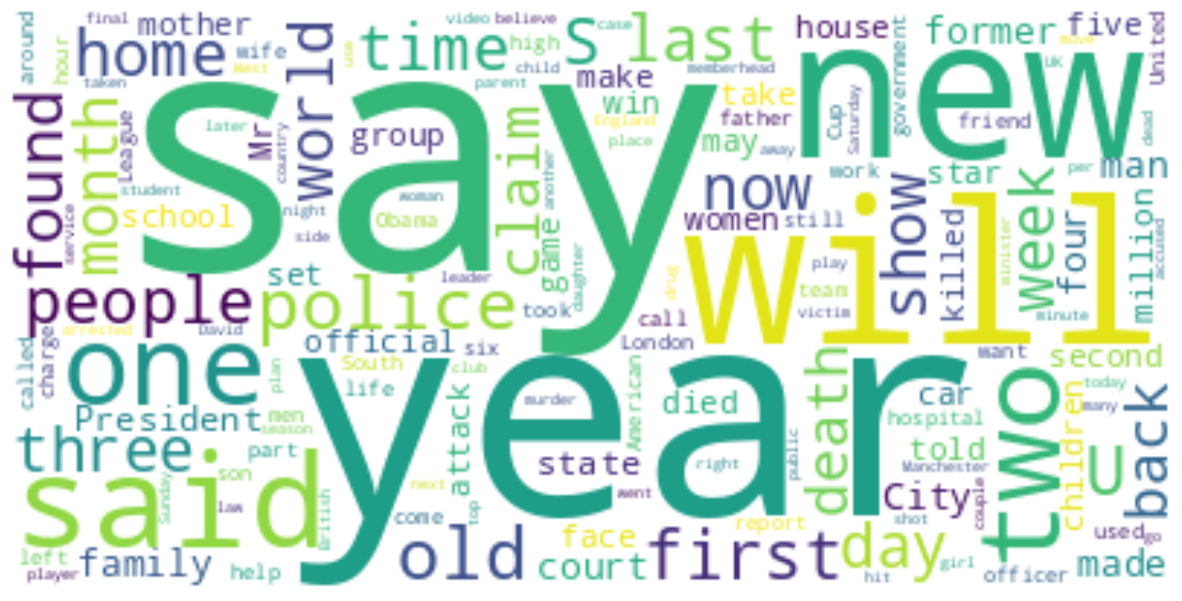

In [27]:
preprocessor.generate_wordcloud(all_highlights_sample)

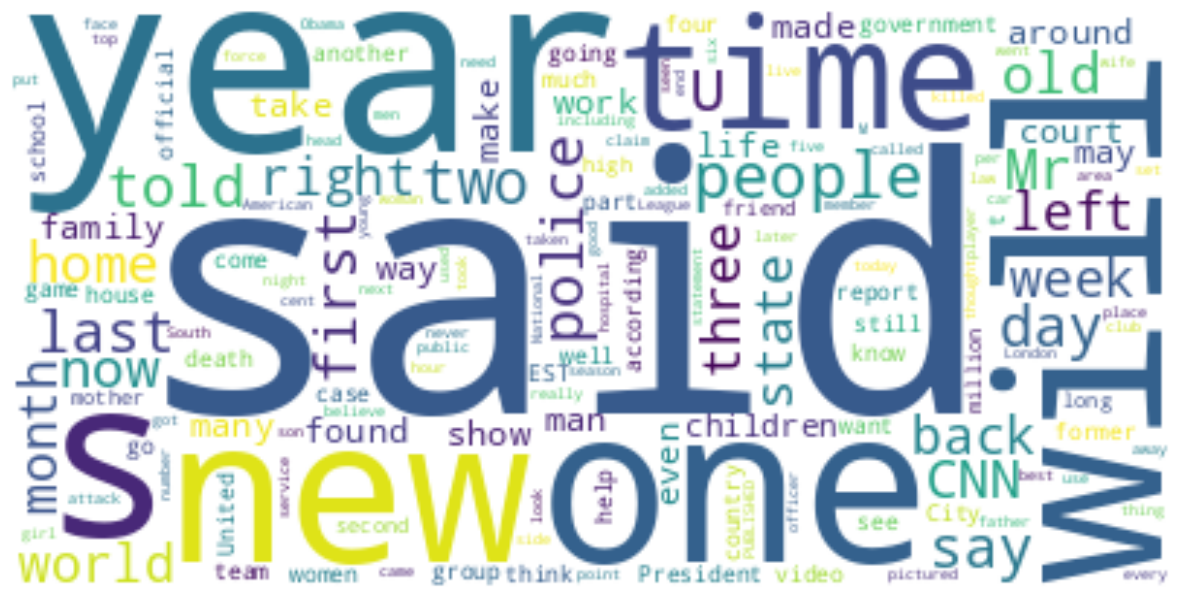

In [26]:
preprocessor.generate_wordcloud(all_news_sample)

In [24]:
train_df["clean_article"] = train_df['article'].apply(lambda x: preprocessor.complete_preprocess(x))
train_df["clean_highlights"] = train_df['highlights'].apply(lambda x: preprocessor.complete_preprocess(x))
train_df.head()

,article,highlights,id,clean_article,clean_highlights
0,"By . Tom Gardner . PUBLISHED: . 05:50 EST, 29 ...","David Stedman, 43, had been let out of prison ...",1e0276de8fafe8c9fd8c8cb02d55185da8db11fc,"[[], [tom, gardner], [publish], [05, 50, est, ...","[[david, stedman, 43, let, prison, early, poli..."
1,New York (CNN) -- The New York Police Departme...,"NEW: Bloomberg says NYPD ""has a lot of capabil...",bc8d0b00ac9fcf39fdc10452d5fd9b0b7a1476fb,"[[new, york, cnn, new, york, police, departmen...","[[new, bloomberg, say, nypd, lot, capabilities..."
2,This man has starred in more Hollywood blockbu...,"Colin Follenweider has appeared in Die Hard, X...",a526856afefa670a7b35cdef0f42ceeac39dfd68,"[[man, star, hollywood, blockbusters, favourit...","[[colin, follenweider, appear, die, hard, x, m..."
3,(CNN) -- The best chocolate cake I ever ate in...,Restaurant owner Kamal Hamade was among 21 peo...,bc5c143bfab220756a685ee3c781718787af3205,"[[cnn, best, chocolate, cake, ever, eat, kabul...","[[restaurant, owner, kamal, hamade, among, 21,..."
4,Loic Remy insists Chelsea remain well placed t...,Chelsea beat Watford 3-0 in the FA Cup to prog...,95b31f74c3fabcce31bbdc119565e0830f60e583,"[[loic, remy, insist, chelsea, remain, well, p...","[[chelsea, beat, watford, 3, 0, fa, cup, progr..."


In [23]:
validation_df["clean_article"] = validation_df['article'].apply(lambda x: preprocessor.complete_preprocess(x))
validation_df["clean_highlights"] = validation_df['highlights'].apply(lambda x: preprocessor.complete_preprocess(x))
validation_df.head()

,article,highlights,id,clean_article,clean_highlights
0,"(CNN)Share, and your gift will be multiplied. ...",Zully Broussard decided to give a kidney to a ...,a4942dd663020ca54575471657a0af38d82897d6,"[[cnn, share, gift, multiply], [may, sound, li...","[[zully, broussard, decide, give, kidney, stra..."
1,"(CNN)On the 6th of April 1996, San Jose Clash ...",The 20th MLS season begins this weekend .\nLea...,4157bc4da185971e2742f349d69a037343bc0d95,"[[cnn, 6th, april, 1996, san, jose, clash, dc,...","[[20th, mls, season, begin, weekend], [league,..."
2,"(CNN)French striker Bafetimbi Gomis, who has a...",Bafetimbi Gomis collapses within 10 minutes of...,60736693e3b1b32d14337a317190c6606e879a85,"[[cnn, french, striker, bafetimbi, gomis, hist...","[[bafetimbi, gomis, collapse, within, 10, minu..."
3,(CNN)It was an act of frustration perhaps more...,Rory McIlroy throws club into water at WGC Cad...,8cdf9cc3ed0276b7a7944cc18ba459355b5984ad,"[[cnn, act, frustration, perhaps, commonly, as...","[[rory, mcilroy, throw, club, water, wgc, cadi..."
4,(CNN)A Pennsylvania community is pulling toget...,"Cayman Naib, 13, hasn't been heard from since ...",2e6613d531843515bf5401286cc3e45c4df530d2,"[[cnn, pennsylvania, community, pull, together...","[[cayman, naib, 13, hear, since, wednesday], [..."


In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
test_df["clean_article"] = test_df['article'].apply(lambda x: preprocessor.complete_preprocess(x))
test_df["clean_highlights"] = test_df['highlights'].apply(lambda x: preprocessor.complete_preprocess(x))
test_df.head()

,article,highlights,id,clean_article,clean_highlights
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,"[[cnn, palestinian, authority, officially, bec...","[[membership, give, icc, jurisdiction, allege,..."
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,"[[cnn, never, mind, cat, nine, live], [stray, ...","[[theia, bully, breed, mix, apparently, hit, c..."
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69,"[[cnn, follow, news, lately, certain, things, ...","[[mohammad, javad, zarif, spend, time, john, k..."
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca,"[[cnn, five, americans, monitor, three, weeks,...","[[17, americans, expose, ebola, virus, sierra,..."
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f,"[[cnn, duke, student, admit, hang, noose, make...","[[student, longer, duke, university, campus, f..."


In [18]:
class DLPipeline: # Define the DLPipeline class
    def __init__(self):
        pass  # You can add initialization logic here if needed

# Instantiate DL Pipeline
dl_pipeline = DLPipeline()

In [17]:
# Instantiate custom preprocessor
preprocessor = Preprocess()

In [16]:
class Preprocess():
  def __init__(self):
    pass
  def toLower(self, x):
    '''Converts string to lowercase'''
    return x.lower()

  def sentenceTokenize(self, x):
    '''Tokenizes document into sentences'''
    sent_tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
    sentences = sent_tokenizer.tokenize(x)
    return sentences

  def preprocess_sentences(self, all_sentences):
    '''Tokenizes sentences into words, removes punctuations, stopwords and
    performs tokenization'''
    word_tokenizer = nltk.RegexpTokenizer(r"\w+")
    sentences = []
    special_characters = re.compile("[^A-Za-z0-9 ]")
    for s in all_sentences:
      # remove punctuation
      s = re.sub(special_characters, " ", s)
      # Word tokenize
      words = word_tokenizer.tokenize(s)
      # Remove Stopwords
      words = self.removeStopwords(words)
      # Perform lemmatization
      words = self.wordnet_lemmatize(words)
      sentences.append(words)
    return sentences

  def removeStopwords(self, sentence):
    '''Removes stopwords from a sentence'''
    stop_words = stopwords.words('english')
    tokens = [token for token in sentence if token not in stop_words]
    return tokens

  def wordnet_lemmatize(self, sentence):
    '''Lemmatizes tokens in a sentence'''
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in sentence]
    return tokens

  def complete_preprocess(self, text):
    '''Performs complete preprocessing on document'''
    #Convert text to lowercase
    text_lower = self.toLower(text)
    #Sentence tokenize the document
    sentences = self.sentenceTokenize(text_lower)
    #Preprocess all sentences
    preprocessed_sentences = self.preprocess_sentences(sentences)
    return preprocessed_sentences

  def generate_wordcloud(self, text):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.figure(figsize=(15,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

  def calculate_length(self, df):
    df["article_len"] = df["article"].apply(lambda x: len(x.split()))
    df["highlights_len"] = df["highlights"].apply(lambda x: len(x.split()))
    return df

  def most_similar_words(self, model, words):
    '''Returns most similar words to a list of words'''
    for word in words:
      print("Most similar to ", word,": ", model.wv.most_similar(word))

  def word2vec_model(self, sentences,num_feature, min_word_count,
                    window_size, down_sampling,  sg):
    '''Creates and trains Word2Vec model'''
    num_thread = 5 # Remove the extra space at the beginning of this line
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = word2vec.Word2Vec(sentences,
                          #iter = iteration,
                          vector_size=num_feature,
                          min_count = min_word_count,
                          window = window_size,
                          sample = down_sampling,
                          workers=num_thread,
                          sg = sg,
                          epochs = 20)
    return model

  def glove_model(self, sentences, window_size, num_features, lr, iterations):
    '''Creates and trains GloVe model'''
    num_thread = 5
    corpus = Corpus()
    # Create word co occurence matrix
    corpus.fit(sentences, window=window_size)
    glove = Glove(no_components=num_features, learning_rate=lr)
    # Fit model
    glove.fit(corpus.matrix, epochs=iterations, no_threads=num_thread)
    glove.add_dictionary(corpus.dictionary)
    return glove

  def most_similar_words_glove(self, model, words):
    '''Returns most similar words to a list of words for GloVe model'''
    for word in words:
      print("Most similar to ", word,": ", model.most_similar(word))

  def top_10_frequent_words(self, model):
    '''Returns top 10 frequent words'''
    # sort model vocab according to top frequent words
    model.sorted_vocab
    top_words = model.wv.index_to_key[:10]
    return top_words

In [15]:
# Sample with replacement or adjust the sample size to be less than or equal to the DataFrame size.
all_highlights_sample = ' '.join(train_df['highlights'].sample(n=min(50000, len(train_df)), replace=True))
len(all_highlights_sample)

8907102

In [14]:
all_news_sample = ' '.join(train_df['article'].sample(n=min(50000, len(train_df)), replace=True))
# Sample with replacement or adjust the sample size to be less than or equal to the DataFrame size.
len(all_news_sample)

120899265

In [13]:
# Sample summary
train_df.iloc[0]['highlights']

"David Stedman, 43, had been let out of prison early when police knocked on his door to discuss the terms of his release .\nCareer criminal Stedman, from Gosport, Hampshire, mistook the visit for being caught red-handed for a burglary the night before .\nStedman proceeded to tell officers about a break-in and even gave them the victim's address .\nJudge sentences Stedman, who has more than 100 previous convictions, including 27 for burglary, to three years in jail ."

In [12]:
#Sample article
train_df.iloc[0]['article']

"By . Tom Gardner . PUBLISHED: . 05:50 EST, 29 June 2012 . | . UPDATED: . 16:12 EST, 29 June 2012 . Having just been released from prison, you might have expected prolific burglar David Stedman to try to keep on the straight and narrow. But not only did the drug addict break into another house almost straight away, he then admitted the crime to police officers who called at his home to check the conditions of his licence. 'Are you here about the burglary,' he asked them, then proceeded to tell the stunned officers the address of his victim and show them what he had stolen. Jailed: Judge Patrick Hooton, left, sentenced career criminal David Stedman, right, to three years in prison after he confessed to a burglary to police who had come to his home on an unrelated matter . Stedman, 43, was on parole from a . 42-month sentence imposed for ten burglaries when he decided to break . into a house on a whim as he walked past. He stole a computer, jewellery box and cash after breaking through a

In [11]:
# Snapshot of dataset
train_df.head()

,article,highlights,id
0,"By . Tom Gardner . PUBLISHED: . 05:50 EST, 29 ...","David Stedman, 43, had been let out of prison ...",1e0276de8fafe8c9fd8c8cb02d55185da8db11fc
1,New York (CNN) -- The New York Police Departme...,"NEW: Bloomberg says NYPD ""has a lot of capabil...",bc8d0b00ac9fcf39fdc10452d5fd9b0b7a1476fb
2,This man has starred in more Hollywood blockbu...,"Colin Follenweider has appeared in Die Hard, X...",a526856afefa670a7b35cdef0f42ceeac39dfd68
3,(CNN) -- The best chocolate cake I ever ate in...,Restaurant owner Kamal Hamade was among 21 peo...,bc5c143bfab220756a685ee3c781718787af3205
4,Loic Remy insists Chelsea remain well placed t...,Chelsea beat Watford 3-0 in the FA Cup to prog...,95b31f74c3fabcce31bbdc119565e0830f60e583


In [10]:
# Sample data for computational purposes
train_df = dataset["train"].to_pandas().sample(30000).reset_index(drop=True)

In [9]:
# Convert to Pandas DataFrame
train_df = dataset["train"].to_pandas()
validation_df = dataset["validation"].to_pandas()
test_df = dataset["test"].to_pandas()

# Now you can print the shape
print("Training set shape:", train_df.shape)
print("Validation set shape:", validation_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (287113, 3)
Validation set shape: (13368, 3)
Test set shape: (11490, 3)


In [8]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
from huggingface_hub import notebook_login
notebook_login()


In [4]:
# Download nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Import necessary libraries
import nltk
from collections import Counter
import heapq
from rouge_score import rouge_scorer
from transformers import pipeline
import gensim
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
import seaborn as sns
import fasttext
from gensim.models import *
#from keras.preprocessing.text import Tokenizer # This line caused the error.
from tensorflow.keras.preprocessing.text import Tokenizer # Import from tensorflow.keras instead
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import from tensorflow.keras
from tensorflow.keras.layers import Activation, Dropout, Dense  # Import from tensorflow.keras
from tensorflow.keras.layers import Flatten, LSTM, Bidirectional # Import from tensorflow.keras
from tensorflow.keras.layers import GlobalMaxPooling1D # Import from tensorflow.keras
from tensorflow.keras.layers import Embedding # Import from tensorflow.keras
from tensorflow.keras.models import Sequential # Import from tensorflow.keras
from gensim.models.keyedvectors import KeyedVectors
from tensorflow.keras import Model # Import from tensorflow.keras
from tensorflow.keras.layers import Layer # Import from tensorflow.keras
import tensorflow.keras.backend as K # Import from tensorflow.keras
from tensorflow.keras.layers import Input, Dense, SimpleRNN # Import from tensorflow.keras
from tensorflow.keras.layers import GlobalAveragePooling1D # Import from tensorflow.keras
import logging
from numpy import array
from numpy import asarray
from numpy import zeros
import fasttext
import evaluate

In [2]:
!pip install --upgrade gensim
!pip install --no-cache-dir transformers sentencepiece
!pip install datasets
!pip install evaluate
!pip install rouge_score
!pip install fasttext
!pip install glove-python-binary



ERROR: Could not find a version that satisfies the requirement glove-python-binary (from versions: none)
ERROR: No matching distribution found for glove-python-binary
